## 任务1
> 代码和预训练的模型托管在：<https://github.com/AIboy996/simple-CLR>

对比监督学习和自监督学习在图像分类任务上的性能表现


### 实现

- 模型：[ResNet-18](https://pytorch.org/vision/master/models/generated/torchvision.models.resnet18.html)（输出的特征纬度：512x512）
- 使用的自监督学习算法：[SimCLR - A Simple Framework for Contrastive Learning of Visual Representations](https://github.com/google-research/simclr)
- 预训练数据集：[Tiny ImageNet 200](https://www.image-net.org/)
    - **200 classes, 600(=500+50+50) 64×64 colored images for each class**
- 评测数据集：[CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html)
    - **100 classes, 600(=500+100) 32x32 colored images for each class**

### 模型训练

简称|训练算法|预训练数据集|评测方式|评测数据集
--|--|--|--|--
super-transfer|有监督|ImageNet|Linear Classification Protocol, transfer learning|CIFAR-100
selfsuper-transfer|自监督|ImageNet|Linear Classification Protocol, transfer learning|CIFAR-100
selfsuper|自监督|CIFAR-100|Linear Classification Protocol|CIFAR-100
super|有监督|CIFAR-100|直接评测|CIFAR-100

运行[data/get_dataset.sh](data/get_dataset.sh)自动下载、解压缩数据集。

运行[run_train.sh](run_train.sh)可以训练上述的四个模型。

允许[test.py](test.py)可以评测训练好的四个模型：
```python
PREATRAINED_MODELS = {
    "super-transfer": [
        f"runs/Jun25_15-00-{13}_user-AS-4124GS-TNR/checkpoint_0099.pth.tar",
        ResNet,
    ],
    "selfsuper-transfer": [
        f"runs/Jun25_15-00-{14}_user-AS-4124GS-TNR/checkpoint_0099.pth.tar",
        ResNetSimCLR,
    ],
    "selfsuper": [
        f"runs/Jun25_15-00-{16}_user-AS-4124GS-TNR/checkpoint_0099.pth.tar",
        ResNetSimCLR,
    ],
    "super": [
        f"runs/Jun25_15-00-{15}_user-AS-4124GS-TNR/checkpoint_0099.pth.tar",
        ResNet,
    ],
}
```

训练过程如图：
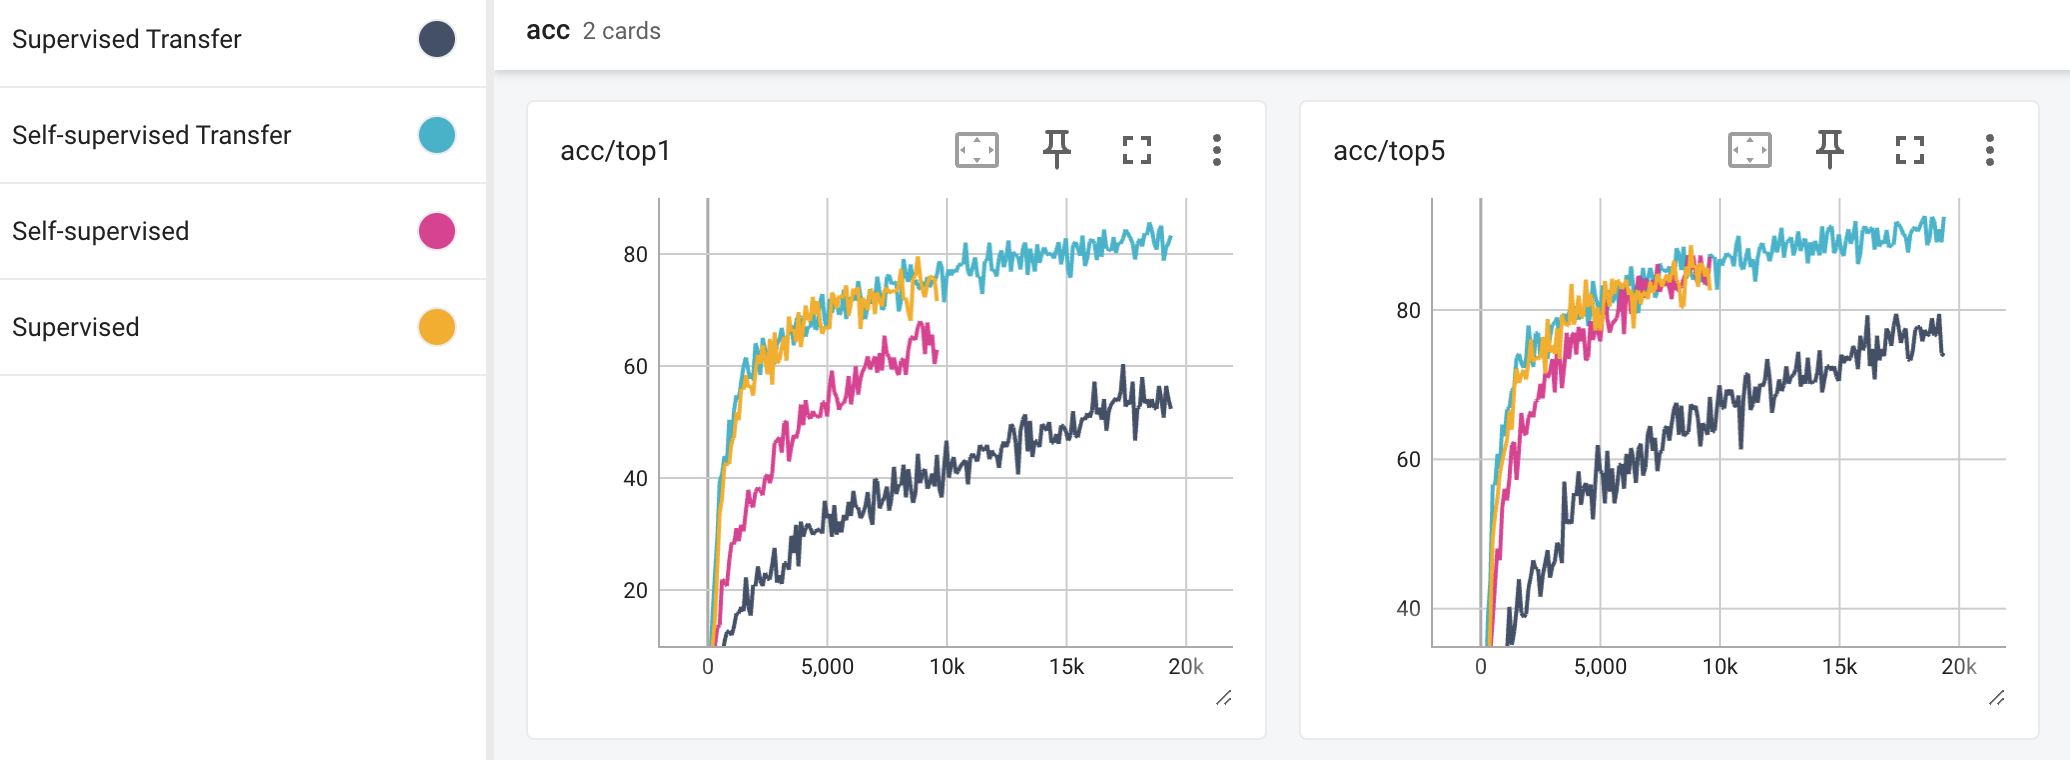

可见有监督训练的迁移学习模型显著更难训练。

评测结果如下：
简称|评测方式|TOP1 accuracy| TOP5 accuracy
--|--|--|--
selfsuper-transfer|Linear Classification Protocol, transfer learning|32.93|61.08
super-transfer|Linear Classification Protocol, transfer learning|38.15|66.66
selfsuper|Linear Classification Protocol|35.77|63.55
super|直接评测|50.80|76.95

> TOP1 accuracy意为测试集中模型输出的概率中**最大的即为正确标签**的比例。
> 
> TOP5 accuracy意为测试集中模型输出的概率中**最大的前五个包含正确标签**的比例。